In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
all_data = pd.read_csv("vgg16_cifar10.csv")
all_data.head()

,run,operation,started,time,status,label,blocker,dataset,gpu,model,...,Accuracy/preprune,Loss/postprune,Loss/preprune,Sparsity,best_post_acc,best_post_loss,best_pre_acc,best_pre_loss,immediate_post_acc,immediate_post_loss
0,1dd45d78,main.py,2022-05-24 18:44:16,1:46:37,completed,vgg16_cifar10,none,cifar10,cuda,vgg16,...,0.9348,0.274538,0.311446,0.5831,0.9398,0.273107,0.9370,0.294045,0.9353,0.312867
1,bd2c6bfa,main.py,2022-05-24 18:43:20,2:13:36,completed,vgg16_cifar10,none,cifar10,cuda,vgg16,...,0.9356,0.294948,0.315273,0.7866,0.9392,0.294148,0.9365,0.306974,0.8781,1.211767
2,b95d324a,main.py,2022-05-24 18:43:01,1:46:51,completed,vgg16_cifar10,none,cifar10,cuda,vgg16,...,0.9339,2.302588,0.320833,0.9330,0.1000,2.302456,0.9347,0.319182,0.1000,2.312019
3,e761c559,main.py,2022-05-24 18:42:42,2:13:36,completed,vgg16_cifar10,none,cifar10,cuda,vgg16,...,0.9342,2.302581,0.310690,0.9603,0.1000,2.302480,0.9346,0.303984,0.1000,2.309137
4,f760a2ff,main.py,2022-05-24 18:40:34,1:46:39,completed,vgg16_cifar10,none,cifar10,cuda,vgg16,...,0.9335,2.302584,0.321270,0.9790,0.1000,2.302535,0.9354,0.285731,0.1000,2.306355


In [3]:
all_data = all_data[["blocker", "pruner", "best_pre_acc", "best_post_acc", "Sparsity"]]
all_data["acc_drop"] = all_data["best_pre_acc"] - all_data["best_post_acc"]
all_data.head()

,blocker,pruner,best_pre_acc,best_post_acc,Sparsity,acc_drop
0,none,magnitude,0.9370,0.9398,0.5831,-0.0028
1,none,magnitude,0.9365,0.9392,0.7866,-0.0027
2,none,magnitude,0.9347,0.1000,0.9330,0.8347
3,none,magnitude,0.9346,0.1000,0.9603,0.8346
4,none,magnitude,0.9354,0.1000,0.9790,0.8354


In [4]:
all_data.sort_values(by="acc_drop")

,blocker,pruner,best_pre_acc,best_post_acc,Sparsity,acc_drop
40,alds,magnitude,0.9334,0.9422,0.3936,-0.0088
31,none,alignment_output,0.9343,0.9407,0.7692,-0.0064
96,square,alignment_output,0.9320,0.9382,0.1149,-0.0062
30,none,alignment_output,0.9355,0.9416,0.5781,-0.0061
51,alds,relative_error,0.9358,0.9418,0.6345,-0.0060
...,...,...,...,...,...,...
28,none,alignment_output_sampling,0.9379,0.1000,0.9883,0.8379
80,square,magnitude,0.9380,0.1000,0.9888,0.8380
74,square,magnitude,0.9381,0.1000,0.9153,0.8381
21,none,alignment_output_sampling,0.9387,0.1000,0.7749,0.8387


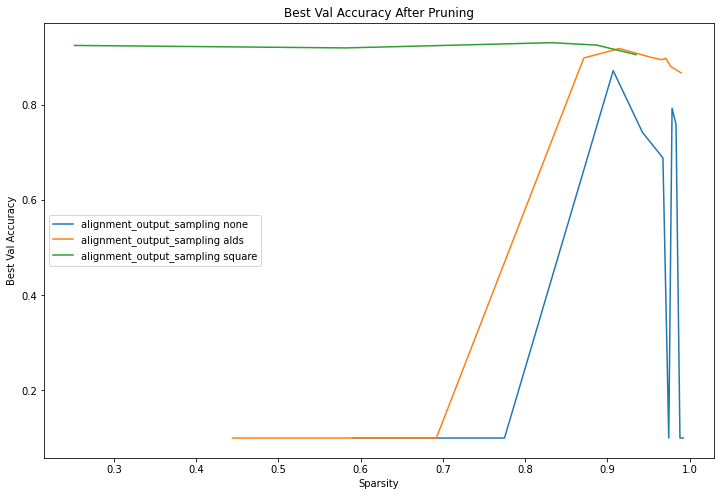

In [6]:
data = all_data[all_data["pruner"] == "alignment_output_sampling"]
plt.figure(figsize=(12, 8))
for blocker in data["blocker"].unique():
    b = data[data["blocker"] == blocker]
    for pruner in b["pruner"].unique():
        p = b[b["pruner"] == pruner].sort_values(by="Sparsity")
        plt.plot(p["Sparsity"], p["best_post_acc"], label=f"{pruner} {blocker}")
plt.legend()
plt.xlabel("Sparsity")
plt.ylabel("Best Val Accuracy")
# plt.ylim(0.8, 0.95)
# plt.xlim(0.95, 0.995)
plt.title("Best Val Accuracy After Pruning")
plt.show()